In [ ]:
# Import packages

import  pandas as pd
import  seaborn as sns
import  matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AML/Data/housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 1. Eyeballing the data to understand the data

In [ ]:
'''Its method is a quick way to:Understand the structure of your DataFrame (number of rows and columns).
  Check the data types of each column.
  Identify missing values in each column.
  Estimate memory usage of the DataFrame.
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#  method in pandas provides a summary of statistical information about the numerical columns in a DataFrame.
#  This method is highly useful for understanding the distribution and central tendencies of your data

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
'''
Cardinality in the context of data analysis and databases refers to the uniqueness of data values within a column or attribute.
It describes how many distinct values are present in a column and is useful for understanding the diversity or variability of data
'''

df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### **1.Data Cleaning**




1. Handle Missing Values
2. Detect and Cleaning  Outliers
3. Feature Transformation
4. Convert Data Types
5. Remove Duplicates
6. Fix Structural Errors

#### **1.Handling Missing Nos**

In [ ]:
len(df)

20640

In [ ]:
missing_counts  =  df.isna().sum()
missing_percent = (df.isna().sum() / len(df)) * 100  # Percentage of missing values

# Combine into one table
missing_data = pd.DataFrame({
                        'Missing Values': missing_counts,
                        'Percentage (%)': missing_percent.round(2)
                    })

missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data

,Missing Values,Percentage (%)
total_bedrooms,207,1.0


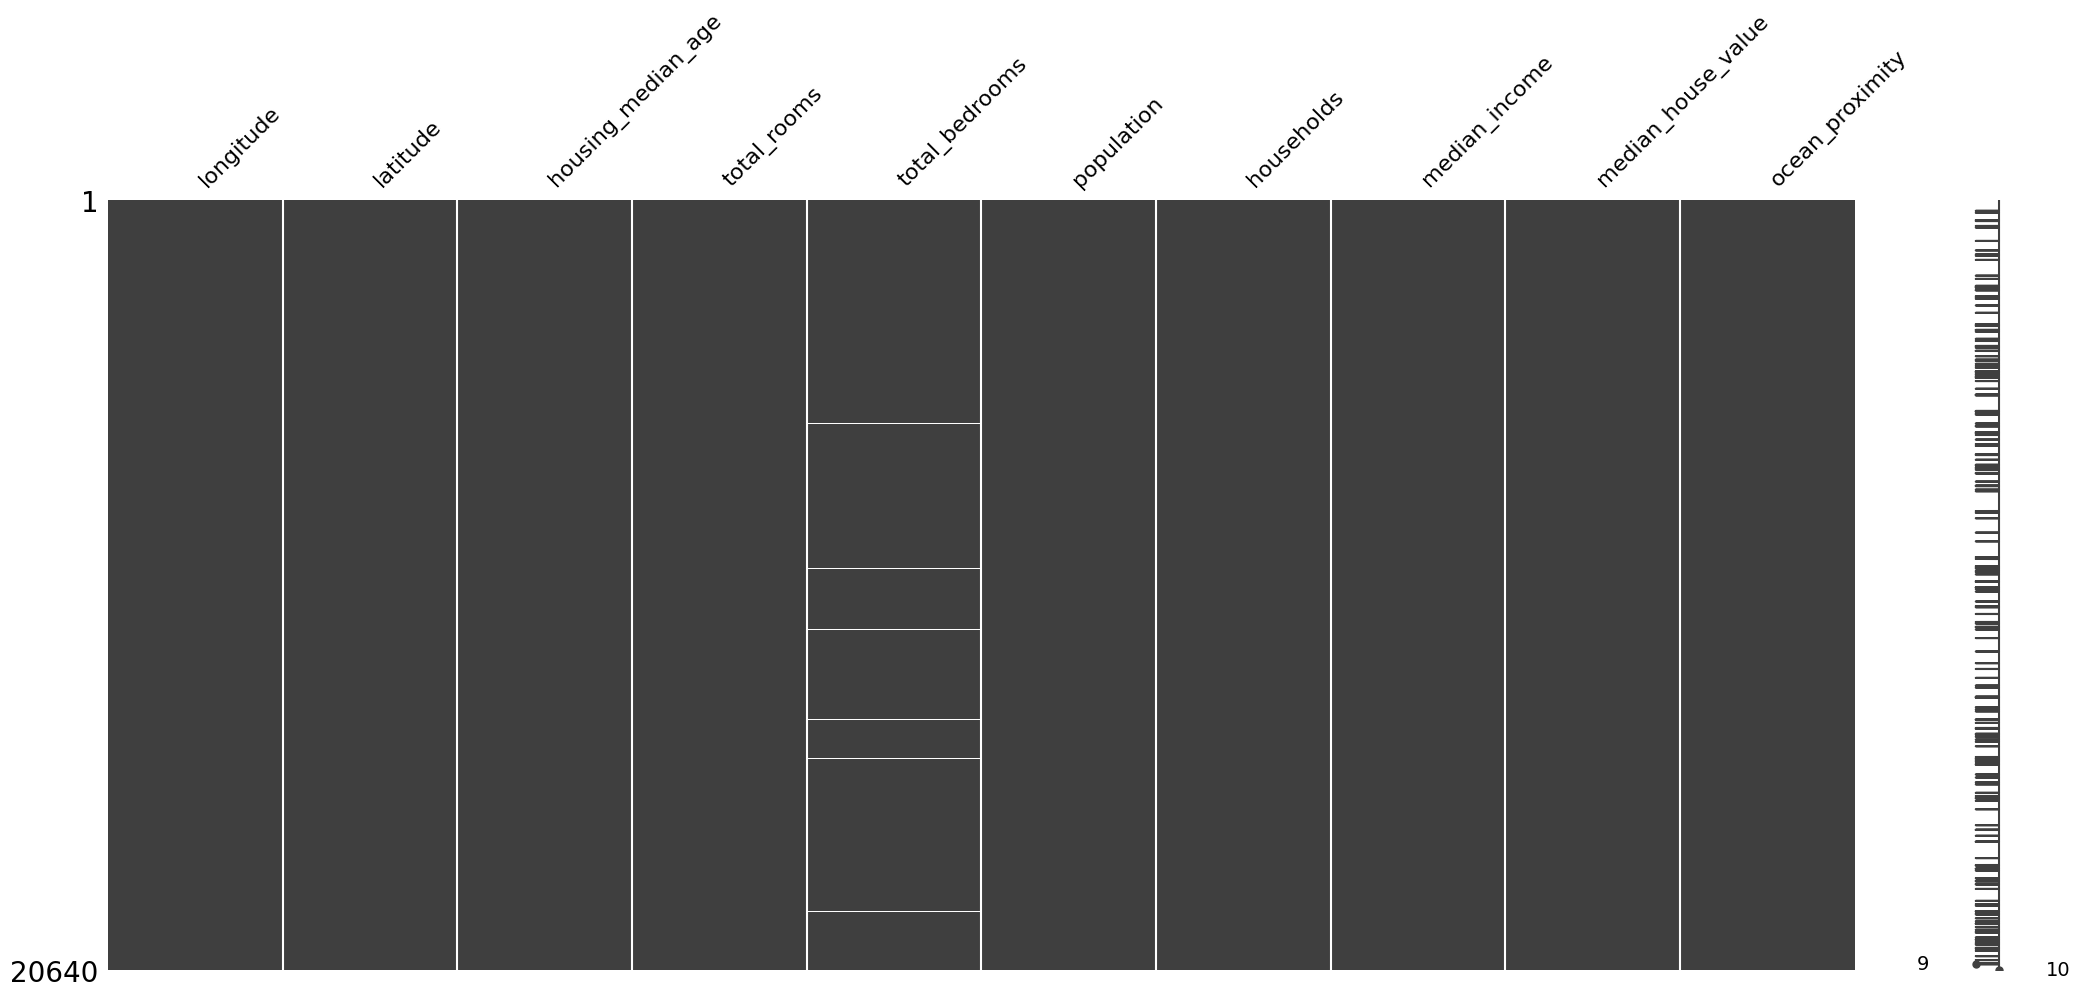

In [ ]:
# We can also visualize our missing Nos using libraries like missingno
# pip install missingno
import missingno as mn

mn.matrix(df);

**1. Treating Missing Nos**

Understand the Nature of Missing Data is important in treating them

Determine why the data is missing:
1. Missing Completely at Random (MCAR): The reason something is missing has nothing to do with the data.
    - Ex **A sensor randomly fails to record temperature due to power loss**
    - Impact: Doesn't bias the data.
    - Treatment: Safely remove rows or impute with mean/median.

   
2. Missing at Random (MAR)   : The reason something is missing depends on other things we know.

    - Ex **Women are less likely to report income, but gender is recorded**
    - Impact : Can introduce bias if not treated properly
    - Treatment Use imputation based on related columns



3. Missing Not at Random (MNAR: The reason something is missing depends on the thing that’s missing itself)

   - Ex **High earners are more likely to withhold salary info**
   - Impact Strong bias potential.
   - Treatment
        - domain-specific approaches
        - correct more data



----
----

**Methods of Treating Missing Values**

1. Remove the missing values
2. Impute missing values
    - Mean/Median/Mode Imputation
    - Forward/Backward Fill    Use the last known value (forward fill) or the next known value common in time-series data
    - Custom Imputation


In [ ]:
# Drop Missing Values

df_cleaned    = df.dropna()  # Drop missing Values
nrows_dropped = df.shape[0] - df_cleaned.shape[0]

print(df.shape)
print(df_cleaned.shape)
print(nrows_dropped)

(20640, 10)
(20433, 10)
207


In [ ]:
# Use Imputation

# Mean Imputation
# df['total_bedrooms_imput_mean'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

# # Median Imputation
# df['total_bedrooms_impute_mode'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())


df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

#### **2.Handling Outliers**



Reasons to handle outliers in Machine learning

- **Improve Model Accuracy** since some models are affected by outliers
- **Faster and Better Training** outliers may increase training time or cause instability in optimization
- Outliers can cause models to memorize noise, thinking it’s a real pattern(**Avoid Overfitting**)
- Enable Robust Feature Scaling

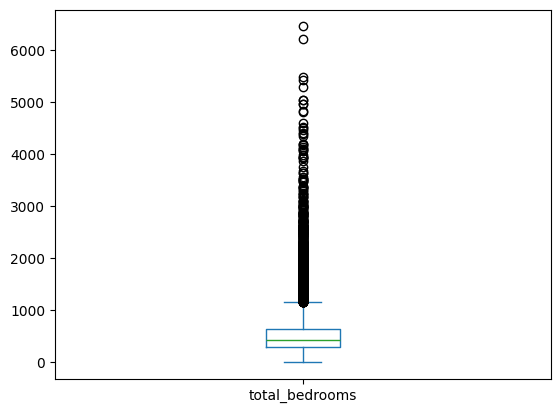

In [ ]:
df['total_bedrooms'].plot(kind='box'); # we can use boxplot to detect outliers

In [ ]:
list_= ['lee','bundi','60']

for i in list_:
  print(i)

lee
bundi
60


Outliers in housing_median_age:
Series([], Name: housing_median_age, dtype: float64)


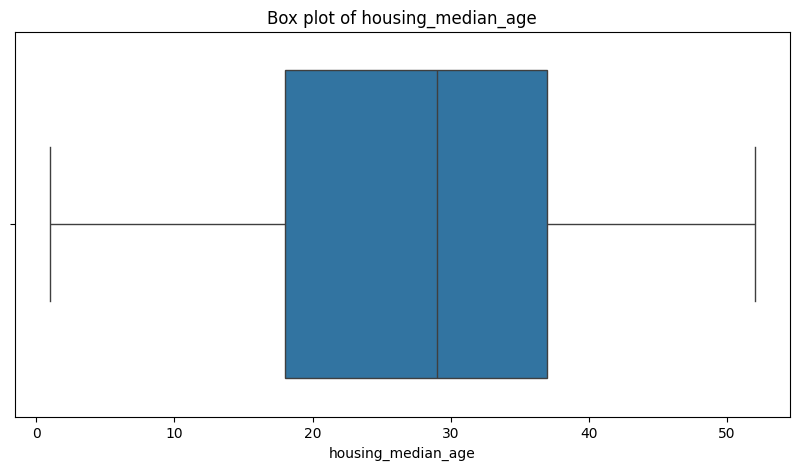

Outliers in total_rooms:
1         7099.0
101       5806.0
104       5871.0
185       5963.0
283      12842.0
          ...   
20543     6861.0
20544     8800.0
20563    12139.0
20567     6809.0
20629    10035.0
Name: total_rooms, Length: 1287, dtype: float64


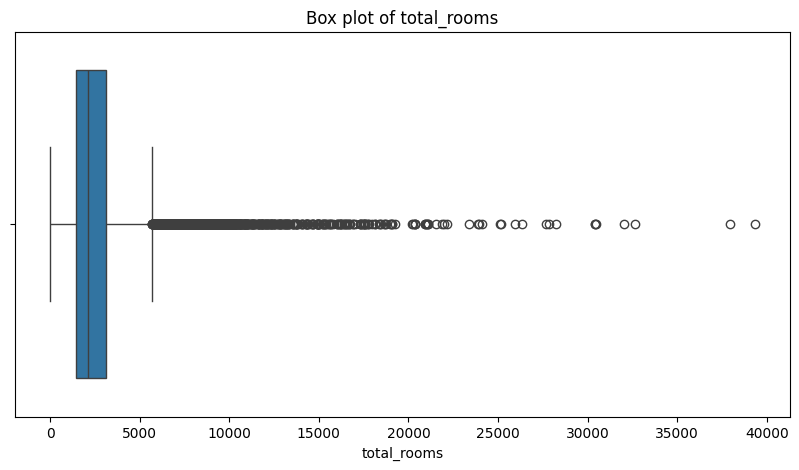

Outliers in total_bedrooms:
95       2477.0
96       1331.0
98       1270.0
100      1414.0
101      1603.0
          ...  
20539    1516.0
20543    1820.0
20544    1857.0
20563    2640.0
20629    1856.0
Name: total_bedrooms, Length: 1306, dtype: float64


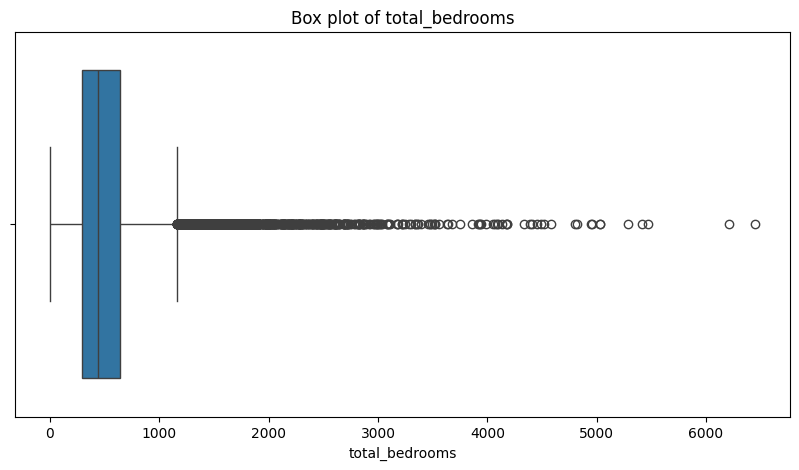

Outliers in population:
95       3469.0
185      4367.0
283      4985.0
460      3337.0
485      3276.0
          ...  
20543    3717.0
20544    6330.0
20563    6837.0
20604    3265.0
20629    6912.0
Name: population, Length: 1196, dtype: float64


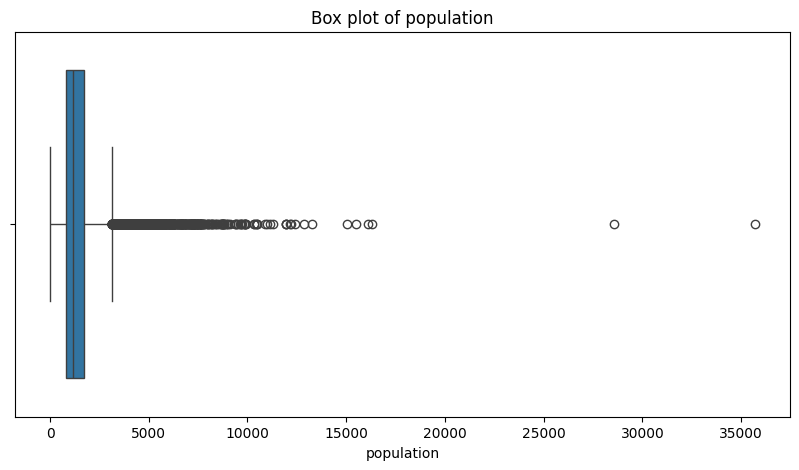

Outliers in households:
1        1138.0
95       2323.0
96       1180.0
98       1250.0
100      1250.0
          ...  
20541    1115.0
20543    1767.0
20544    1832.0
20563    2358.0
20629    1818.0
Name: households, Length: 1220, dtype: float64


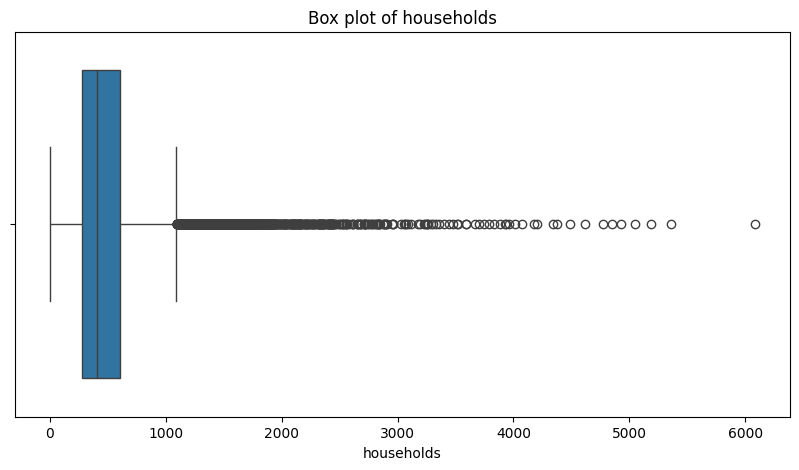

Outliers in median_income:
0         8.3252
1         8.3014
131      11.6017
134       8.2049
135       8.4010
          ...   
20426    10.0472
20427     8.6499
20428     8.7288
20436    12.5420
20503     8.2787
Name: median_income, Length: 681, dtype: float64


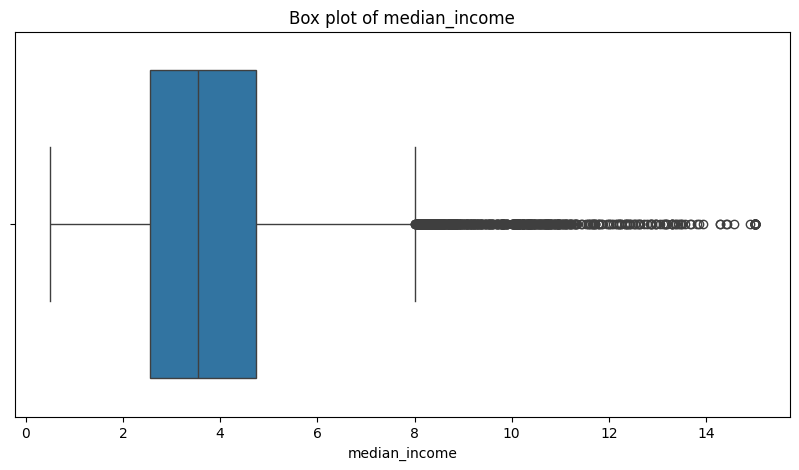

Outliers in median_house_value:
89       500001.0
140      483300.0
459      500001.0
489      489600.0
493      500001.0
           ...   
20422    500001.0
20426    500001.0
20427    500001.0
20436    500001.0
20443    500001.0
Name: median_house_value, Length: 1071, dtype: float64


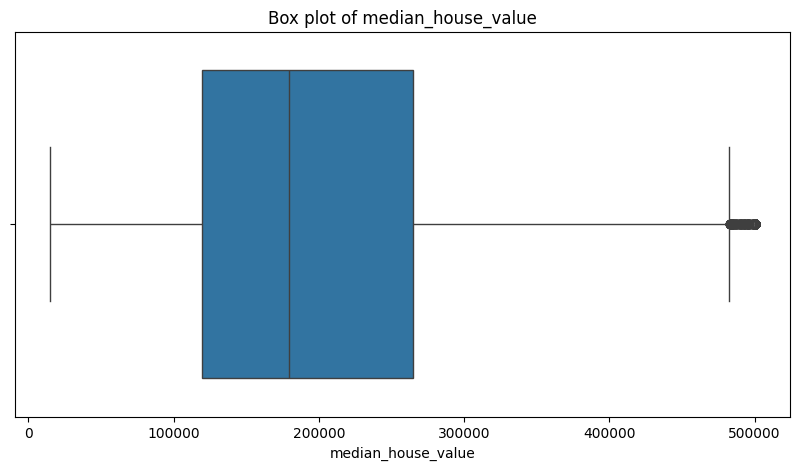

In [ ]:
# To identify outlier we can use IQR Method and support that with box plot visualization.
# Numerical variable


numerical_cols = df.select_dtypes(include=['float'])

# Function to calculate IQR and identify outliers

def identify_outliers(col):

    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return col[(col < lower_bound) | (col > upper_bound)]

# Detecting outliers for each numerical column and plotting box plots to proof

for col in numerical_cols:

    if col  not in ['longitude','latitude']: # remove columns with binary types

        outliers = identify_outliers(df[col])
        print(f"Outliers in {col}:")
        print(outliers)

        # Plotting box plot
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')
        plt.show()

In [ ]:
# Identify and Remove Outliers
def remove_outliers(df, col):

    Q1 = df[col].quantile(0.20)
    Q3 = df[col].quantile(0.70)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


for col in numerical_cols:
    if col not in ['longitude','latitude']: # remove columns with binary types
        df = remove_outliers(df, col)
        print(f'Removed outliers for columns {col} succefully')

Removed outliers for columns housing_median_age succefully
Removed outliers for columns total_rooms succefully
Removed outliers for columns total_bedrooms succefully
Removed outliers for columns population succefully
Removed outliers for columns households succefully
Removed outliers for columns median_income succefully
Removed outliers for columns median_house_value succefully


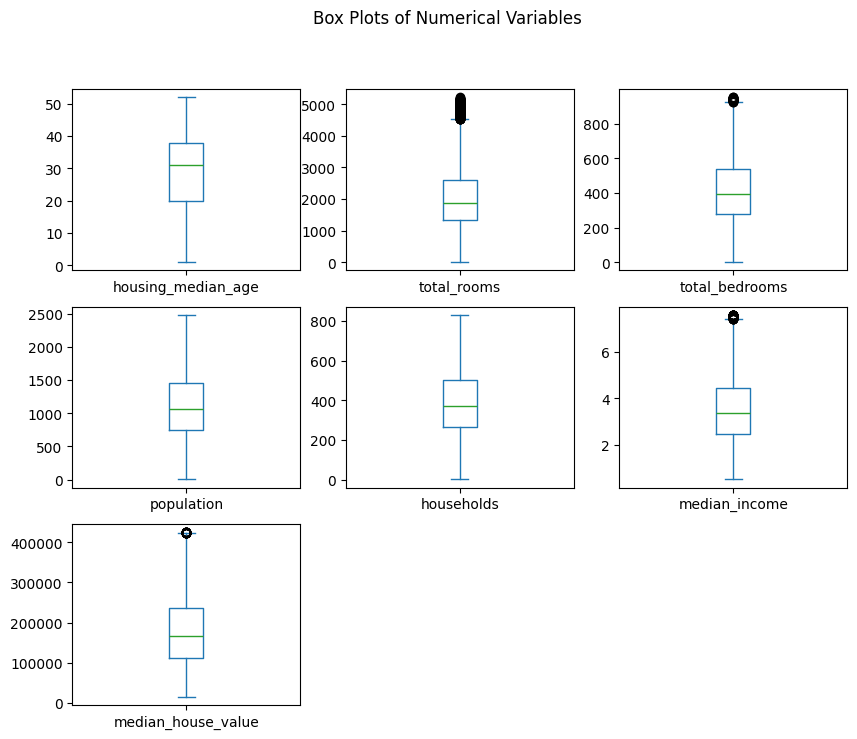

In [ ]:
df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']].plot(kind='box', subplots=True, layout=(3,3), figsize=(10, 8), title='Box Plots of Numerical Variables')
plt.show()

In [ ]:
# Assigment

# Try Capping and Flooring using pandas to treat Outliers

### **2.Data Transformation**

Methods include;

1. Feature creation of construction
2. Scaling / Normalization
3. Feature Encoding



##### **1.Feature Creation /	Feature Engineering**

Raw data often lacks meaningful patterns.Creating new features helps expose hidden relationships that models can learn from.

In [ ]:
# We have created a new features from existing features

df['rooms_per_households']     = df['total_rooms']  / df['total_bedrooms']
df['population_per_household'] = df['population']  /  df['households']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,population_per_household
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.314554,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,5.184049,2.128405


##### **2. Data Encoding**



1. Encoding (Data Encoding:)

Encoding is the process of converting categorical (non-numeric) data into a numeric format so that machine learning models can understand and use it.

---

**Types of Encoding in Machine Learning**

| Encoding Type         | Description                                                                     | When to Use                                               |
|-----------------------|---------------------------------------------------------------------------------|-----------------------------------------------------------|
| **Label Encoding**    | Assigns a unique number to each category (e.g., Male = 0, Female = 1)            | When categories have an **order** or only **two classes** |
| **One-Hot Encoding**  | Creates a new binary column for each category (e.g., "Red" → Red=1, others=0)   | When categories have **no order** (nominal data)          |
| **Ordinal Encoding**  | Converts categories into ordered numbers (e.g., Low=1, Medium=2, High=3)         | When there's a **natural ranking/order**                  |



In [ ]:
# We will use One Hot Encoding function from sklearn model
from sklearn.preprocessing import OneHotEncoder

# Intialize the oneHotEncoder
encoder        = OneHotEncoder(sparse_output=False)  # create an instance
encoder_data   = encoder.fit_transform(df[['ocean_proximity']])
print(encoder_data[0])

#  Convert the encoded data to a DataFrame for easier visualization
encoded_df = pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out(['ocean_proximity']))

df = pd.concat([df, encoded_df], axis=1).drop(columns=['ocean_proximity'])
df.head(1)

[0. 0. 0. 1. 0.]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_households,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,7.721053,2.80226,0.0,0.0,0.0,1.0,0.0


#### **3. Feature Scaling**



Feature Scaling is the process of transforming your input variables (features) so that they all have the same scale or range.

 This is crucial because many machine learning algorithms are sensitive to the scale of the data.

Why Feature Scaling?

1. Improve Algorithm Performance


2. Scaling ensures that features with larger ranges do not dominate the learning process

3. Feature scaling can make optimization algorithms converge more quickly.

4. Required for distance based Algorithms

----
----

**Common Techniques**

1. Min-Max Scaling(Normalization) $$ X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} $$
2. Standardization (Z-score Normalization) $$X_{scaled} = \frac{X - \mu}{\sigma}$$
3. Robust Scaling  - Uses the median and interquartile range to scale features, making it robust to outliers.$$X_{scaled} = \frac{X - \text{median}}{\text{IQR}}$$
4. Scales features to be within [-1, 1] by dividing by the maximum absolute value.$$X_{scaled} = \frac{X}{\max(|X|)}$$

----
----

**Choosing a Scaling Method**

1. Min-Max Scaling: Use when features need to be within a specific range, especially for algorithms that require normalized data.
2. Standardization: Preferred when features are normally distributed or when algorithms assume data is centered around zero.
3. Robust Scaling: Useful for datasets with significant outliers.
4. MaxAbs Scaling: Effective for data with many zero values or when features are sparse.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler


# Print the original DataFrame
print("Original DataFrame:")

# 1. Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)
print("\nMin-Max Scaled Data Done:")

# 2. Standardization
scaler_std = StandardScaler()
df_standardized = pd.DataFrame(scaler_std.fit_transform(df), columns=df.columns)
print("\nStandardized Data Done:")

# 3. MaxAbs Scaling
scaler_maxabs = MaxAbsScaler()
df_maxabs = pd.DataFrame(scaler_maxabs.fit_transform(df), columns=df.columns)
print("\nMaxAbs Scaled Data Done:")

# 4. Robust Scaling
scaler_robust = RobustScaler()
df_robust = pd.DataFrame(scaler_robust.fit_transform(df), columns=df.columns)
print("\nRobust Scaled Data Done:")


Original DataFrame:

Min-Max Scaled Data Done:

Standardized Data Done:

MaxAbs Scaled Data Done:

Robust Scaled Data Done:


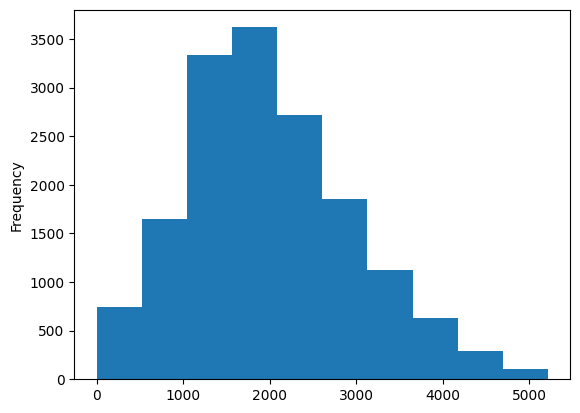

In [ ]:
df['total_rooms'].plot(kind='hist');  # histogram of total_rooms

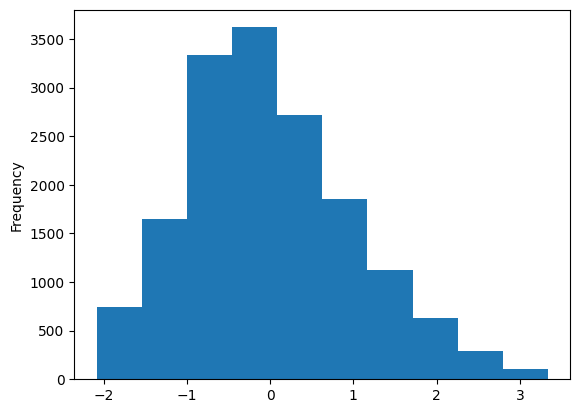

In [ ]:
df_standardized['total_rooms'].plot(kind='hist'); # Histogram of scaled total rooms

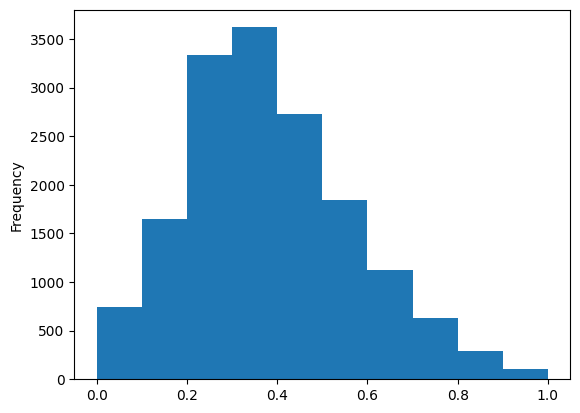

In [ ]:
df_minmax['total_rooms'].plot(kind='hist'); # Histogram of scaled total rooms using minmax